## Ethereum Price Prediction

Ethereum Dataset (ethereum_dataset.csv):

This dataset has the following features:

* Date(UTC) : Date of transaction
* UnixTimeStamp : unix timestamp
* eth_etherprice : price of ethereum
* eth_tx : number of transactions per day
* eth_address : Cumulative address growth
* eth_supply : Number of ethers in supply
* eth_marketcap : Market cap in USD
* eth_hashrate : hash rate in GH/s
* eth_difficulty : Difficulty level in TH
* eth_blocks : number of blocks per day
* eth_uncles : number of uncles per day
* eth_blocksize : average block size in bytes
* eth_blocktime : average block time in seconds
* eth_gasprice : Average gas price in Wei
* eth_gaslimit : Gas limit per day
* eth_gasused : total gas used per day
* eth_ethersupply : new ether supply per day
* eth_chaindatasize : chain data size in bytes
* eth_ens_register : Ethereal Name Service (ENS) registrations per day

The ethereum price dataset description is as folows:

* Date : date of observation

* Open : Opening price on the given day
* High : Highest price on the given day
* Low : Lowest price on the given day
* Close : Closing price on the given day
* Volume : Volume of transactions on the given day
* Market Cap : Market capitalization in USD

Ethereum dataset is obtained from Etherscan https://etherscan.io/charts

### Inspiration

*Some of the questions which could be inferred from this dataset are:*

* How did the historical prices / market capitalizations of various currencies change over time?
* Predicting the future price of the currencies
* Which currencies are more volatile and which ones are more stable?
* How does the price fluctuations of currencies correlate with each other?
* Seasonal trend in the price fluctuations
* Ethereum dataset could be used to look at the following:

### Factors affecting the ether price.
Directional prediction of bitcoin ether price.
Actual bitcoin price prediction.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [ ]:
#etData =pd.read_csv("ethereum_dataset.csv")

In [ ]:
#etData.head()

In [ ]:
#etData.isnull().sum()

In [ ]:
#etData.info()

In [ ]:
#etCprice =pd.read_csv("ethereum_classic_price.csv")

In [ ]:
#etCprice.head()

In [ ]:
#etCprice.shape

In [3]:
etPrice =pd.read_csv("ethereum_price.csv")
etPrice.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Feb 20, 2018",943.57,965.26,892.95,895.37,"2,545,260,000","92,206,500,000"
1,"Feb 19, 2018",921.67,957.78,921.55,943.87,"2,169,020,000","90,047,700,000"
2,"Feb 18, 2018",973.35,982.93,915.45,923.92,"2,567,290,000","95,077,100,000"
3,"Feb 17, 2018",944.75,976.60,940.75,974.12,"2,525,720,000","92,264,000,000"
4,"Feb 16, 2018",934.79,950.00,917.85,944.21,"2,369,450,000","91,272,100,000"


In [4]:
etPrice.shape

(929, 7)

In [5]:
etPrice.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Feb 20, 2018",943.57,965.26,892.95,895.37,"2,545,260,000","92,206,500,000"
1,"Feb 19, 2018",921.67,957.78,921.55,943.87,"2,169,020,000","90,047,700,000"
2,"Feb 18, 2018",973.35,982.93,915.45,923.92,"2,567,290,000","95,077,100,000"
3,"Feb 17, 2018",944.75,976.60,940.75,974.12,"2,525,720,000","92,264,000,000"
4,"Feb 16, 2018",934.79,950.00,917.85,944.21,"2,369,450,000","91,272,100,000"


In [6]:
etPrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929 entries, 0 to 928
Data columns (total 7 columns):
Date          929 non-null object
Open          929 non-null float64
High          929 non-null float64
Low           929 non-null float64
Close         929 non-null float64
Volume        929 non-null object
Market Cap    929 non-null object
dtypes: float64(4), object(3)
memory usage: 50.9+ KB


### Coverting the Date column to date time

In [8]:
type("Date")

str

In [9]:
type(etPrice["Date"])

pandas.core.series.Series

In [10]:
etPrice["Date"].head()

0    Feb 20, 2018
1    Feb 19, 2018
2    Feb 18, 2018
3    Feb 17, 2018
4    Feb 16, 2018
Name: Date, dtype: object

In [11]:
# Converting to date time
etPrice["Date"] = pd.to_datetime(etPrice.Date, format= '%b %d, %Y')

In [12]:
etPrice["Date"].head()

0   2018-02-20
1   2018-02-19
2   2018-02-18
3   2018-02-17
4   2018-02-16
Name: Date, dtype: datetime64[ns]

In [ ]:
#etPrice.head()

In [13]:
# Spliting Columns to Day, Month Year
times = 'Year Month Day'.split()
times

['Year', 'Month', 'Day']

In [14]:
etPrice['Year'] = etPrice["Date"].apply(lambda x: x.year)
etPrice['Month'] = etPrice["Date"].apply(lambda y: y.month)
etPrice['Day'] = etPrice["Date"].apply(lambda z: z.day)
etPrice[times].head(5)

,Year,Month,Day
0,2018,2,20
1,2018,2,19
2,2018,2,18
3,2018,2,17
4,2018,2,16


In [ ]:
#etPrice.head()

In [15]:
# visualising the prices by month
etPriceMonth = etPrice.groupby("Month").count()
etPriceMonth.head()

,Date,Open,High,Low,Close,Volume,Market Cap,Year,Day
Month,,,,,,,,,
1,93,93,93,93,93,93,93,93,93
2,77,77,77,77,77,77,77,77,77
3,62,62,62,62,62,62,62,62,62
4,60,60,60,60,60,60,60,60,60
5,62,62,62,62,62,62,62,62,62


In [16]:
etPricemnth = etPriceMonth.reset_index()
etPricemnth.head()

,Month,Date,Open,High,Low,Close,Volume,Market Cap,Year,Day
0,1,93,93,93,93,93,93,93,93,93
1,2,77,77,77,77,77,77,77,77,77
2,3,62,62,62,62,62,62,62,62,62
3,4,60,60,60,60,60,60,60,60,60
4,5,62,62,62,62,62,62,62,62,62


### Creating a simple plot off of the dataframe indicating the count of Ethereum per month.

(1, 12)

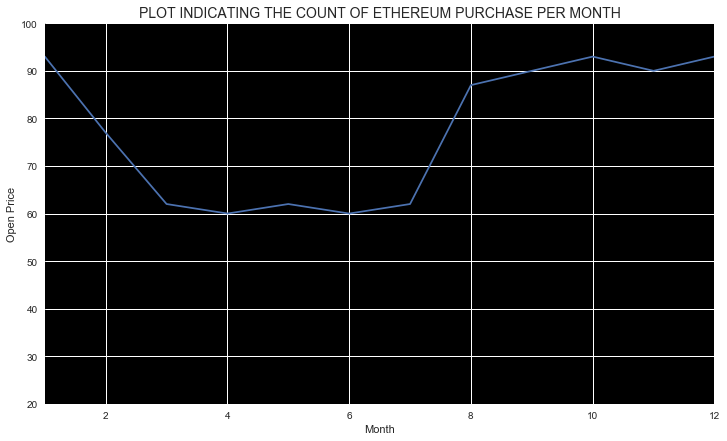

In [17]:
sns.set()
plt.figure(figsize= (12,7))
ax=plt.gca()
ax.set_facecolor("xkcd:black")
plt.plot(etPricemnth["Month"], etPricemnth["Open"])
plt.xlabel("Month")
plt.ylabel("Open Price")
plt.title("PLOT INDICATING THE COUNT OF ETHEREUM PURCHASE PER MONTH", fontsize =14)
plt.ylim([20, 100])
plt.xlim([1, 12])

### Using seaborn's lmplot() to create a linear fit on the number of calls per month

Text(0.5,1,'PLOT INDICATING A LINEAR FIT OF ETHEREUM PURCHASE PER MONTH')

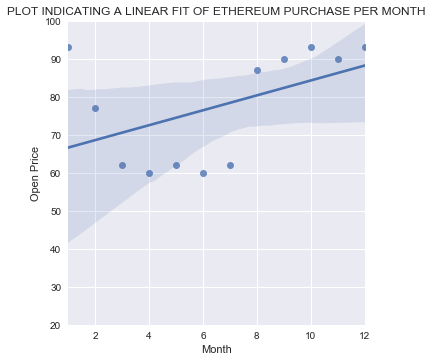

In [19]:
plt.figure(figsize= (10,9))
sns.lmplot(x = "Month", y= "Open", data = etPricemnth)
plt.ylim([20, 100])
plt.xlim([1, 12])
plt.xlabel("Month")
plt.ylabel("Open Price")
plt.title("PLOT INDICATING A LINEAR FIT OF ETHEREUM PURCHASE PER MONTH")

In [20]:
etPrice.head()

,Date,Open,High,Low,Close,Volume,Market Cap,Year,Month,Day
0,2018-02-20,943.57,965.26,892.95,895.37,"2,545,260,000","92,206,500,000",2018,2,20
1,2018-02-19,921.67,957.78,921.55,943.87,"2,169,020,000","90,047,700,000",2018,2,19
2,2018-02-18,973.35,982.93,915.45,923.92,"2,567,290,000","95,077,100,000",2018,2,18
3,2018-02-17,944.75,976.60,940.75,974.12,"2,525,720,000","92,264,000,000",2018,2,17
4,2018-02-16,934.79,950.00,917.85,944.21,"2,369,450,000","91,272,100,000",2018,2,16


In [ ]:
sns.pairplot(etPrice)

In [21]:
df=etPrice.set_index(etPrice.Date)
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap,Year,Month,Day
Date,,,,,,,,,,
2018-02-20,2018-02-20,943.57,965.26,892.95,895.37,"2,545,260,000","92,206,500,000",2018,2,20
2018-02-19,2018-02-19,921.67,957.78,921.55,943.87,"2,169,020,000","90,047,700,000",2018,2,19
2018-02-18,2018-02-18,973.35,982.93,915.45,923.92,"2,567,290,000","95,077,100,000",2018,2,18
2018-02-17,2018-02-17,944.75,976.60,940.75,974.12,"2,525,720,000","92,264,000,000",2018,2,17
2018-02-16,2018-02-16,934.79,950.00,917.85,944.21,"2,369,450,000","91,272,100,000",2018,2,16


In [22]:
fp =etPrice.pivot_table(index="Month", columns="Year", values="Open")
fp.head()

Year,2015,2016,2017,2018
Month,,,,
1,NaN,1.449471,10.117097,1093.1000
2,NaN,4.412414,12.193929,893.0585
3,NaN,11.043226,33.745484,NaN
4,NaN,9.034000,49.387333,NaN
5,NaN,11.206129,120.841290,NaN


In [ ]:
sns.heatmap(fp)

In [23]:
dfDate =df.drop(["Date", "Volume", "Market Cap", "Year", "Month", "Day"], axis=1)
dfDate.head()

,Open,High,Low,Close
Date,,,,
2018-02-20,943.57,965.26,892.95,895.37
2018-02-19,921.67,957.78,921.55,943.87
2018-02-18,973.35,982.93,915.45,923.92
2018-02-17,944.75,976.60,940.75,974.12
2018-02-16,934.79,950.00,917.85,944.21


Text(0.5,1,'RISE AND FALL OF ETHERUM OVER THE YEARS ')

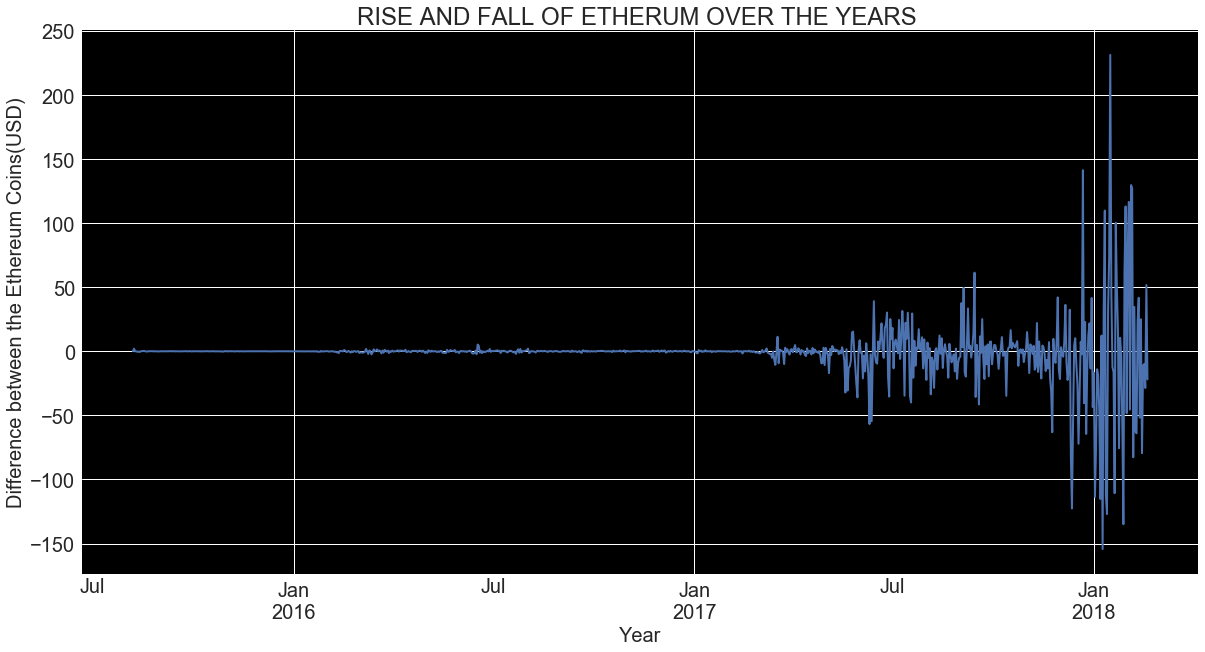

In [24]:
openD = dfDate["Open"]
openD.diff().plot(figsize=(20,10), linewidth=2, fontsize=20)
ax=plt.gca()
ax.set_facecolor("xkcd:black")
plt.xlabel("Year", fontsize=20)
plt.ylabel("Difference between the Ethereum Coins(USD)", fontsize=20)
plt.title("RISE AND FALL OF ETHERUM OVER THE YEARS ", fontsize=24)

Text(0.5,1,'COMPARISON OF ETHERUM OPEN, CLOSE, HIGH AND LOW PRICES OVER THE YEARS ')

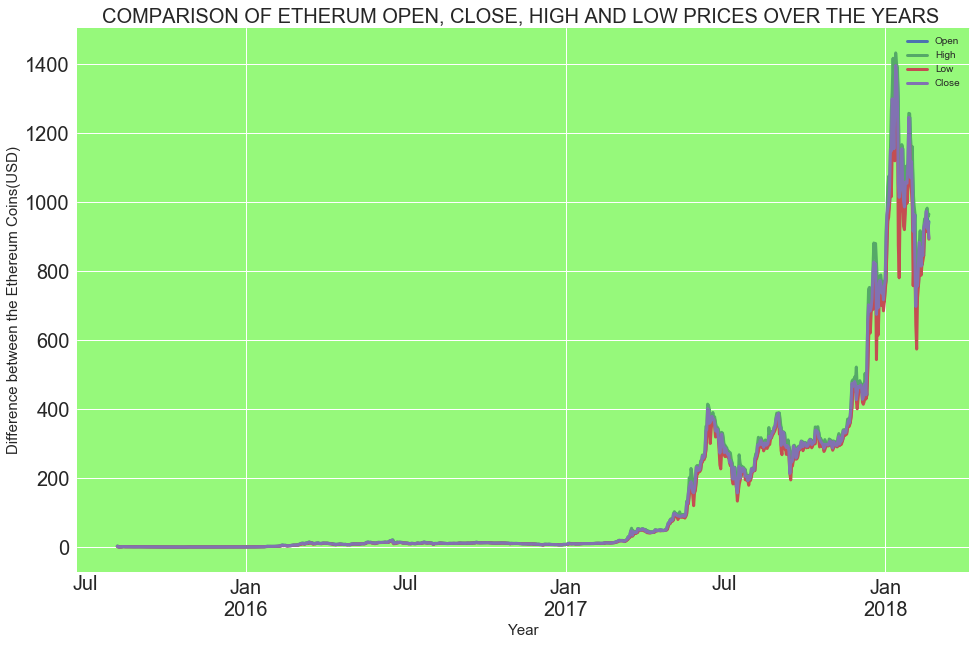

In [30]:
dfDate.plot(figsize=(16,10), linewidth=3, fontsize=20)
ax=plt.gca()
ax.set_facecolor("xkcd:light green")
plt.xlabel("Year", fontsize=15)
plt.ylabel("Difference between the Ethereum Coins(USD)", fontsize=15)
plt.title("COMPARISON OF ETHERUM OPEN, CLOSE, HIGH AND LOW PRICES OVER THE YEARS ", fontsize=20)

Text(0.5,1,'COMPARISON OF ETHERUM OPEN PRICES OVER THE YEARS ')

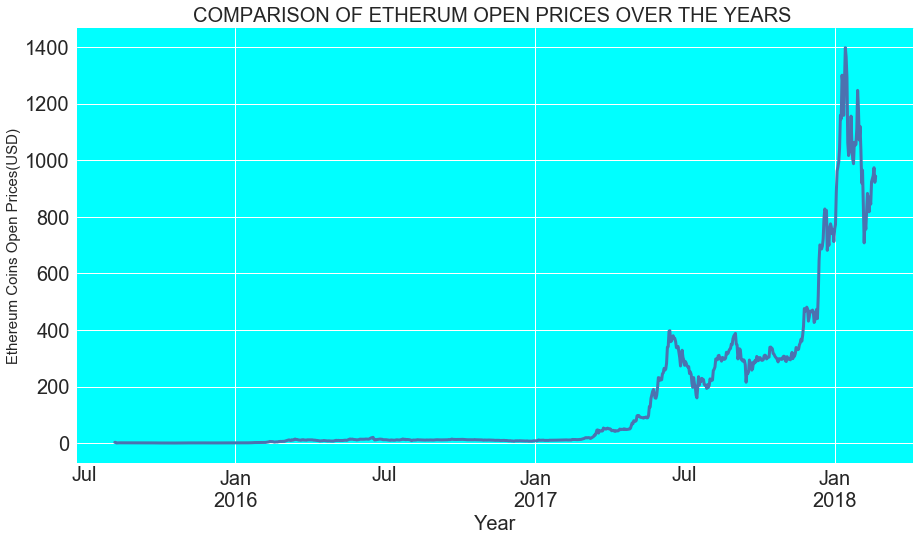

In [30]:
ax=plt.gca()
ax.set_facecolor("xkcd:cyan")
dfDate["Open"].plot(figsize=(15,8), linewidth=3, fontsize=20)
plt.xlabel("Year", fontsize=20)
plt.ylabel("Ethereum Coins Open Prices(USD)", fontsize=15)
plt.title("COMPARISON OF ETHERUM OPEN PRICES OVER THE YEARS ", fontsize=20)

In [ ]:
openD = dfDate["Open"]
openD.rolling(12).mean().plot(figsize=(10,8), linewidth=3, fontsize=20)
plt.xlabel("Year", fontsize=20)

Text(0.5,0,'Year')

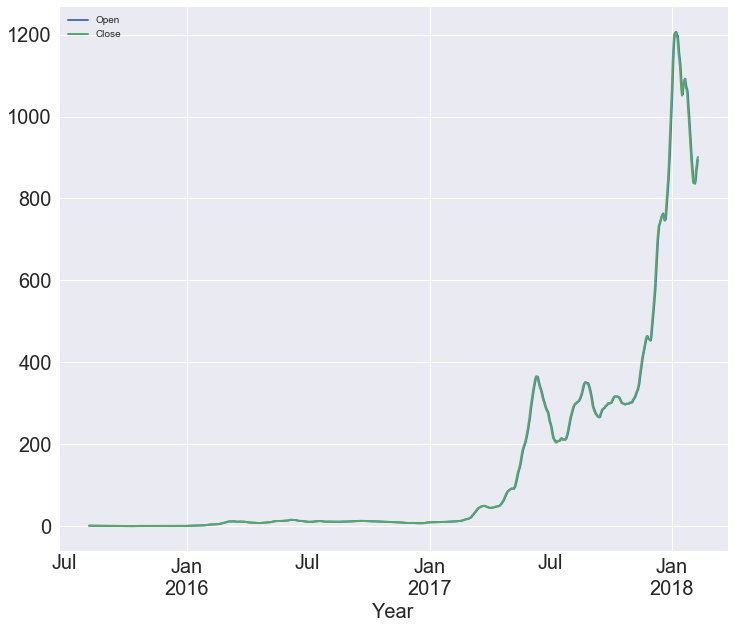

In [31]:
Open = dfDate["Open"]
Close = dfDate["Close"]
concatD = pd.concat([Open.rolling(12).mean(), Close.rolling(12).mean()], axis=1)
concatD.plot(figsize=(12,10), linewidth=2, fontsize=20)
plt.xlabel("Year", fontsize=20)

In [ ]:
#sns.tsplot([df.Open, df.High, df.Low, df.Close], color="indianred" )

In [ ]:
#etPrice.

In [ ]:
#new = etPrice["Open"]
#type(new)

In [ ]:
#etPrice["time"] = etPrice["Date"] + pd.to_timedelta(10, unit="D")
#sns.tsplot(data= etPrice, time="time", value= "Open")

## Creating a plot of the dataframe indicating the count of Ethereum by date

In [32]:
etPriceDate = etPrice.groupby("Date").count()
etPriceDate.head()

,Open,High,Low,Close,Volume,Market Cap,Year,Month,Day
Date,,,,,,,,,
2015-08-07,1,1,1,1,1,1,1,1,1
2015-08-08,1,1,1,1,1,1,1,1,1
2015-08-09,1,1,1,1,1,1,1,1,1
2015-08-10,1,1,1,1,1,1,1,1,1
2015-08-11,1,1,1,1,1,1,1,1,1


In [ ]:
etDate = etPriceDate.reset_index()

In [ ]:
plt.figure(figsize=(9,7))
p =etDate["Date"]
q= etDate["Open"]
plt.plot(p,q)
plt.xlabel("Date")

### Restructing the dataset to produce the trend column

In [33]:
etPrice.head()

,Date,Open,High,Low,Close,Volume,Market Cap,Year,Month,Day
0,2018-02-20,943.57,965.26,892.95,895.37,"2,545,260,000","92,206,500,000",2018,2,20
1,2018-02-19,921.67,957.78,921.55,943.87,"2,169,020,000","90,047,700,000",2018,2,19
2,2018-02-18,973.35,982.93,915.45,923.92,"2,567,290,000","95,077,100,000",2018,2,18
3,2018-02-17,944.75,976.60,940.75,974.12,"2,525,720,000","92,264,000,000",2018,2,17
4,2018-02-16,934.79,950.00,917.85,944.21,"2,369,450,000","91,272,100,000",2018,2,16


In [ ]:
etPrice.count()

In [ ]:
etPrice["High"].loc[0]

In [ ]:
etPrice.head()

In [ ]:
for i in range(1,25):
    print(i)

In [34]:
x =np.zeros(928)
etPrice["Trend"]=pd.Series(x)
etPrice.head()

,Date,Open,High,Low,Close,Volume,Market Cap,Year,Month,Day,Trend
0,2018-02-20,943.57,965.26,892.95,895.37,"2,545,260,000","92,206,500,000",2018,2,20,0.0
1,2018-02-19,921.67,957.78,921.55,943.87,"2,169,020,000","90,047,700,000",2018,2,19,0.0
2,2018-02-18,973.35,982.93,915.45,923.92,"2,567,290,000","95,077,100,000",2018,2,18,0.0
3,2018-02-17,944.75,976.60,940.75,974.12,"2,525,720,000","92,264,000,000",2018,2,17,0.0
4,2018-02-16,934.79,950.00,917.85,944.21,"2,369,450,000","91,272,100,000",2018,2,16,0.0


In [ ]:
etPrice['Open'].nunique()

In [39]:
for i in range(1, 929):
    a = etPrice["Open"].iloc[i]  #present
    b =  etPrice["Open"].iloc[i-1] #previous
    if (a < b):
        etPrice["Trend"].iloc[i] = -1 #reduction
    elif (a > b):
        etPrice["Trend"].iloc[i] = 1 #increase
    else:
        etPrice["Trend"].iloc[i] = 0 #static

C:\Users\IBK\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [36]:
etPrice.head(n = 5)

,Date,Open,High,Low,Close,Volume,Market Cap,Year,Month,Day,Trend
0,2018-02-20,943.57,965.26,892.95,895.37,"2,545,260,000","92,206,500,000",2018,2,20,0.0
1,2018-02-19,921.67,957.78,921.55,943.87,"2,169,020,000","90,047,700,000",2018,2,19,-1.0
2,2018-02-18,973.35,982.93,915.45,923.92,"2,567,290,000","95,077,100,000",2018,2,18,1.0
3,2018-02-17,944.75,976.60,940.75,974.12,"2,525,720,000","92,264,000,000",2018,2,17,-1.0
4,2018-02-16,934.79,950.00,917.85,944.21,"2,369,450,000","91,272,100,000",2018,2,16,-1.0


# Training the data

In [ ]:
plt.figure(figsize = (10, 10))

# datat = data.copy()
# datat['Target'] = target

sns.heatmap(datat.corr(), annot = True)

In [37]:
eth = etPrice.copy()

In [38]:
eth.head()

,Date,Open,High,Low,Close,Volume,Market Cap,Year,Month,Day,Trend
0,2018-02-20,943.57,965.26,892.95,895.37,"2,545,260,000","92,206,500,000",2018,2,20,0.0
1,2018-02-19,921.67,957.78,921.55,943.87,"2,169,020,000","90,047,700,000",2018,2,19,-1.0
2,2018-02-18,973.35,982.93,915.45,923.92,"2,567,290,000","95,077,100,000",2018,2,18,1.0
3,2018-02-17,944.75,976.60,940.75,974.12,"2,525,720,000","92,264,000,000",2018,2,17,-1.0
4,2018-02-16,934.79,950.00,917.85,944.21,"2,369,450,000","91,272,100,000",2018,2,16,-1.0


In [40]:
data = eth.drop(['Trend', 'Date',"Volume", "Market Cap"], axis = 1)

In [41]:
target = eth['Trend']

In [ ]:
# pd.to_numeric(data['Volume'])

data['Volume'] = data['Volume'].apply(lambda x: float(x.replace(',','')))

In [ ]:
data['Market Cap'].sample(30)

In [ ]:
# data.drop('Market Cap', inplace = True, axis = 1)

In [ ]:
data.dtypes

In [ ]:
mms = MinMaxScaler()
newdata = pd.DataFrame(mms.fit_transform(data))

In [ ]:
newdata.head(30)

In [ ]:
newdata.drop(5, axis = 1, inplace = True)

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [43]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state = 89)

In [44]:
# THE ELBOW METHOD

err = []

for i in range(1, 40):
    knn2  = KNeighborsClassifier(n_neighbors = i)
    knn2.fit(X_train, y_train)
    pred = knn2.predict(X_test)
    err.append((accuracy_score(y_test, pred)) * 100)

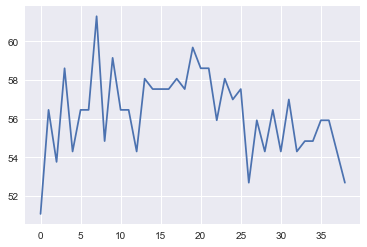

In [45]:
plt.plot(err)

In [ ]:
data.head()

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
logReg = LogisticRegression()

In [48]:
logReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [31]:
y_pred = logReg.predict(X_test)

NameError: name 'logReg' is not defined

In [50]:
print('logReg accuracy: ', accuracy_score(y_test, y_pred))

logReg accuracy:  0.8602150537634409


In [52]:
X_train.head()

,Open,High,Low,Close,Year,Month,Day
145,306.47,307.20,295.47,299.15,2017,9,28
906,1.19,1.21,1.15,1.18,2015,8,29
201,220.18,228.29,219.89,225.34,2017,8,3
146,287.02,308.01,286.82,306.47,2017,9,27
56,763.37,786.79,760.93,773.84,2017,12,26


In [60]:
X_test.head()

,Open,High,Low,Close,Year,Month,Day
840,0.994568,1.07,0.936615,1.01,2015,11,3
111,305.760000,306.40,290.580000,291.69,2017,11,1
126,333.480000,333.48,311.790000,317.08,2017,10,17
710,11.130000,13.53,11.090000,13.53,2016,3,12
419,7.150000,7.62,7.080000,7.52,2016,12,28


In [53]:
y_pred

array([ 1.,  1.,  1., -1., -1., -1.,  1., -1., -1.,  1., -1., -1.,  1.,
        1., -1., -1., -1.,  1., -1., -1.,  1., -1., -1.,  1., -1., -1.,
        1., -1., -1., -1., -1.,  1.,  1.,  1.,  1., -1.,  1.,  1., -1.,
        1., -1.,  1., -1.,  1., -1.,  1.,  1.,  1., -1., -1., -1.,  1.,
        1., -1., -1., -1.,  1.,  1., -1., -1.,  1.,  1., -1.,  1.,  1.,
        1.,  1., -1.,  1.,  1.,  1.,  1., -1., -1., -1.,  1., -1., -1.,
        1., -1.,  1., -1., -1.,  1., -1.,  1.,  1.,  1., -1.,  1.,  1.,
       -1., -1.,  1., -1.,  1.,  1.,  1.,  1.,  1., -1., -1.,  1.,  1.,
        1.,  1., -1.,  1.,  1.,  1., -1.,  1.,  1., -1., -1., -1.,  1.,
       -1.,  1.,  1., -1., -1., -1.,  1., -1.,  1.,  1., -1.,  1.,  1.,
       -1., -1., -1., -1.,  1., -1.,  1., -1.,  1., -1.,  1., -1.,  1.,
        1., -1.,  1., -1., -1., -1., -1.,  1.,  1., -1.,  1.,  1., -1.,
        1.,  1., -1.,  1., -1., -1.,  1.,  1., -1.,  1.,  1.,  1., -1.,
        1., -1.,  1.,  1., -1.,  1., -1.,  1., -1., -1., -1.,  1

In [80]:
logReg.predict([[0,0,0,0,2019,11,3]])

array([1.])

In [84]:
target_names = ["Dropped", "Static", "Increase"]
print(classification_report(y_test, y_pred,target_names=target_names))

             precision    recall  f1-score   support

    Dropped       0.94      0.82      0.87       103
     Static       0.00      0.00      0.00         2
   Increase       0.78      0.94      0.85        81

avg / total       0.86      0.86      0.86       186



C:\Users\IBK\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [85]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

       -1.0       0.94      0.82      0.87       103
        0.0       0.00      0.00      0.00         2
        1.0       0.78      0.94      0.85        81

avg / total       0.86      0.86      0.86       186



C:\Users\IBK\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [1]:
#predicting future trends
X_test.shape

NameError: name 'X_test' is not defined

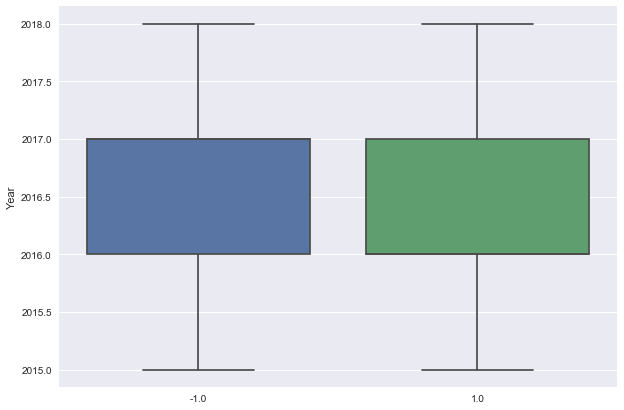

In [77]:
plt.figure(figsize=(10,7))
sns.boxplot(y=X_test["Year"], x=y_pred)

ValueError: Must pass DataFrame with boolean values only

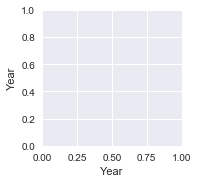

In [67]:
a =pd.DataFrame(X_test["Year"])
b =pd.DataFrame(y_pred)
sns.pairplot(data=a, hue=b)